c:\Users\abhis\anaconda3\Lib\site-packages\torch\nn\modules\transformer.py:392: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch 1/100, Train Loss: 1.3973, Val Loss: 1.3644, Train Accuracy: 0.2869, Val Accuracy: 0.3089
Epoch 2/100, Train Loss: 1.3739, Val Loss: 1.3451, Train Accuracy: 0.3037, Val Accuracy: 0.3340
Epoch 3/100, Train Loss: 1.3557, Val Loss: 1.3394, Train Accuracy: 0.3283, Val Accuracy: 0.3430
Epoch 4/100, Train Loss: 1.3427, Val Loss: 1.3168, Train Accuracy: 0.3376, Val Accuracy: 0.3551
Epoch 5/100, Train Loss: 1.3259, Val Loss: 1.3162, Train Accuracy: 0.3416, Val Accuracy: 0.3701
Epoch 6/100, Train Loss: 1.3170, Val Loss: 1.3036, Train Accuracy: 0.3454, Val Accuracy: 0.3892
Epoch 7/100, Train Loss: 1.2897, Val Loss: 1.2657, Train Accuracy: 0.3752, Val Accuracy: 0.3801
Epoch 8/100, Train Loss: 1.2674, Val Loss: 1.2668, Train Accuracy: 0.4051, Val Accuracy: 0.4152
Epoch 9/100, Train Loss: 1.2505, Val Loss: 1.2404, Train Accuracy: 0.4113, Val Accuracy: 0.4293
Epoch 10/100, Train Loss: 1.2502, Val Loss: 1.2440, Train Accuracy: 0.4093, Val Accuracy: 0.4283
Epoch 11/100, Train Loss: 1.2316, Val L

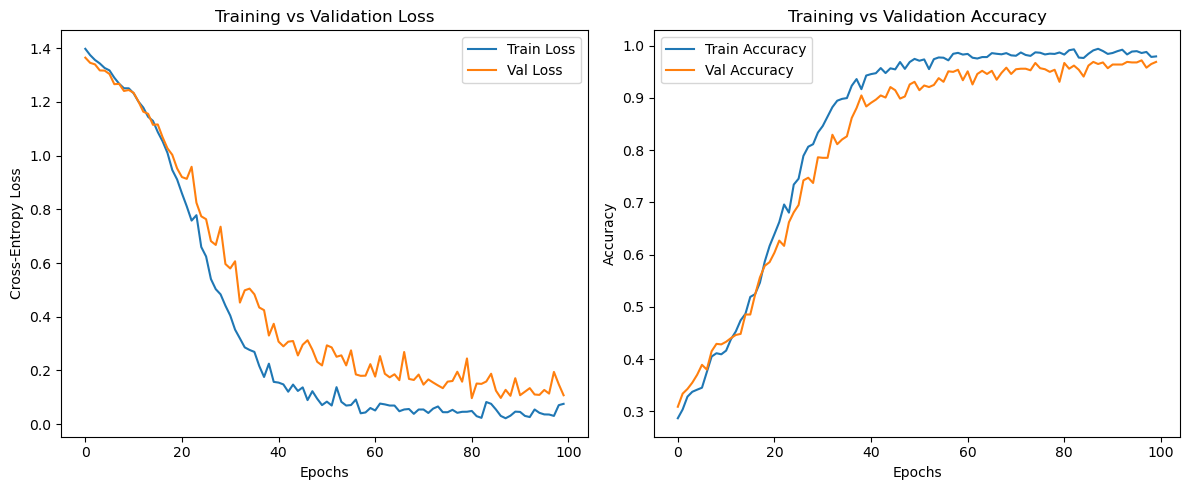

Predicted: Maize, Actual: Maize
Predicted: Cotton, Actual: Cotton
Predicted: Cotton, Actual: Cotton
Predicted: Barley, Actual: Barley
Predicted: Barley, Actual: Barley
Predicted: Barley, Actual: Barley
Predicted: Maize, Actual: Maize
Predicted: Wheat, Actual: Wheat
Predicted: Cotton, Actual: Cotton
Predicted: Maize, Actual: Maize
Predicted: Barley, Actual: Barley
Predicted: Maize, Actual: Maize
Predicted: Cotton, Actual: Cotton
Predicted: Barley, Actual: Barley
Predicted: Cotton, Actual: Cotton
Predicted: Wheat, Actual: Wheat
Predicted: Maize, Actual: Maize
Predicted: Wheat, Actual: Wheat
Predicted: Barley, Actual: Maize
Predicted: Barley, Actual: Barley
Predicted: Maize, Actual: Maize
Predicted: Cotton, Actual: Cotton
Predicted: Barley, Actual: Barley
Predicted: Cotton, Actual: Cotton
Predicted: Maize, Actual: Maize
Predicted: Cotton, Actual: Cotton
Predicted: Barley, Actual: Barley
Predicted: Maize, Actual: Maize
Predicted: Wheat, Actual: Wheat
Predicted: Maize, Actual: Maize
Predict

c:\Users\abhis\anaconda3\Lib\site-packages\torch\nn\modules\transformer.py:392: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import joblib

# --- 1. Data Generation and Preprocessing ---
# Let's create a sample DataFrame to make the code runnable
data = {
    "Region": ["West", "East", "West", "North", "South", "East", "West", "East", "West"],
    "Soil Type": ["Sandy", "Clay", "Sandy", "Loam", "Sandy", "Clay", "Sandy", "Clay", "Loam"],
    "Crop Type": ["Cotton", "Wheat", "Corn", "Rice", "Cotton", "Wheat", "Corn", "Wheat", "Corn"],
    "Rainfall_mm": [800, 750, 900, 1200, 850, 780, 920, 770, 950],
    "Temperature(c)": [27, 22, 25, 29, 26, 23, 24, 23, 26],
    "Fertilizer_Used": [False, True, True, True, False, True, False, True, True],
    "Irrigation_Used": [True, True, False, True, True, True, False, True, False],
    "Weather_Condition": ["Cloudy", "Sunny", "Rainy", "Cloudy", "Sunny", "Rainy", "Sunny", "Rainy", "Sunny"],
    "Days_to_Harvest": [120, 150, 110, 180, 125, 145, 115, 148, 112],
    "Humidity": [65, 70, 80, 85, 68, 72, 75, 71, 78],
    "Moisture": [45, 50, 60, 70, 48, 52, 58, 51, 62],
    "Nitrogen": [20, 25, 30, 35, 22, 28, 32, 26, 31],
    "Potassium": [2, 3, 4, 5, 2, 3, 4, 3, 4],
    "Phosphorous": [15, 18, 20, 22, 16, 19, 21, 17, 20],
}
df = pd.DataFrame(data)
df = pd.read_csv(r"c:\Users\abhis\OneDrive\Desktop\abhigit\SIH-Hackathon\crop_final.csv")

# The target column is now "Crop Type"
target_col = "Crop Type"

# Separate features (X) and target (y)
X = df.drop(columns=[target_col])
y = df[target_col].values

# Identify categorical and numerical features
cat_cols = X.select_dtypes(include=["object", "bool"]).columns.tolist()
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Encode categorical features
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le

# Encode the target column
y_le = LabelEncoder()
y_encoded = y_le.fit_transform(y)
num_classes = len(y_le.classes_)

# Normalize numerical features
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

X = X.values

# Train-test split
X_train, X_val, y_train_encoded, y_val_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# --- 2. PyTorch Dataset and DataLoader ---
class TabularDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long) # Use long for classification labels

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = TabularDataset(X_train, y_train_encoded)
val_dataset = TabularDataset(X_val, y_val_encoded)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

# --- 3. FT-Transformer Model for Classification ---
class FTTransformer(nn.Module):
    def __init__(self, num_features, num_classes, d_model=64, num_heads=4, num_layers=3, dropout=0.1):
        super().__init__()
        
        self.input_layer = nn.Linear(num_features, d_model)
        
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model,
            nhead=num_heads,
            dropout=dropout,
            activation='gelu'
        )
        
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        
        # Final linear layer for classification (outputs a logit for each class)
        self.fc_out = nn.Linear(d_model, num_classes)

    def forward(self, x):
        x = self.input_layer(x)
        x = x.unsqueeze(0)
        x = self.transformer(x)
        x = x.squeeze(0)
        return self.fc_out(x)

# --- 4. Model Training and Evaluation ---
num_features = X.shape[1]
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = FTTransformer(num_features, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

train_losses, val_losses = [], []
train_accuracy, val_accuracy = [], []

EPOCHS = 100
for epoch in range(EPOCHS):
    # ---- Training ----
    model.train()
    epoch_train_loss = 0
    y_true_train, y_pred_train = [], []

    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        epoch_train_loss += loss.item()
        y_true_train.extend(y_batch.cpu().detach().numpy())
        y_pred_train.extend(outputs.argmax(dim=1).cpu().detach().numpy())

    # Train metrics
    epoch_train_loss /= len(train_loader)
    train_acc = accuracy_score(y_true_train, y_pred_train)

    # ---- Validation ----
    model.eval()
    epoch_val_loss = 0
    y_true_val, y_pred_val = [], []

    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            epoch_val_loss += loss.item()

            y_true_val.extend(y_batch.cpu().numpy())
            y_pred_val.extend(outputs.argmax(dim=1).cpu().numpy())

    epoch_val_loss /= len(val_loader)
    val_acc = accuracy_score(y_true_val, y_pred_val)

    train_losses.append(epoch_train_loss)
    val_losses.append(epoch_val_loss)
    train_accuracy.append(train_acc)
    val_accuracy.append(val_acc)

    print(f"Epoch {epoch+1}/{EPOCHS}, Train Loss: {epoch_train_loss:.4f}, Val Loss: {epoch_val_loss:.4f}, Train Accuracy: {train_acc:.4f}, Val Accuracy: {val_acc:.4f}")

# --- 5. Plotting Results ---
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Cross-Entropy Loss")
plt.legend()
plt.title("Training vs Validation Loss")

plt.subplot(1,2,2)
plt.plot(train_accuracy, label="Train Accuracy")
plt.plot(val_accuracy, label="Val Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.tight_layout()
plt.show()

# --- 6. Final Evaluation on Validation Set ---
model.eval()
with torch.no_grad():
    X_val_tensor = torch.tensor(X_val, dtype=torch.float32).to(device)
    preds_logits = model(X_val_tensor)
    preds = preds_logits.argmax(dim=1).cpu().numpy()

# Show first 10 predictions vs actual
for i in range(len(preds)):
    predicted_crop = y_le.inverse_transform([preds[i]])[0]
    actual_crop = y_le.inverse_transform([y_val_encoded[i]])[0]
    print(f"Predicted: {predicted_crop}, Actual: {actual_crop}")

# Compute final metrics
acc = accuracy_score(y_val_encoded, preds)

print(f"\nFinal Metrics on Validation Set:")
print(f"Accuracy: {acc:.4f}")

# --- 7. Save the model and preprocessing objects ---
model_path = 'ft_transformer_model.pth'
scaler_path = 'scaler.joblib'
le_path = 'label_encoders.joblib'
y_le_path = 'y_le.joblib'
num_cols_path = 'num_cols.joblib'

# Save PyTorch model state dictionary
torch.save(model.state_dict(), model_path)
# Save preprocessing objects
joblib.dump(scaler, scaler_path)
joblib.dump(label_encoders, le_path)
joblib.dump(y_le, y_le_path)
joblib.dump(num_cols, num_cols_path)

print("\nModel and preprocessing objects saved.")

# --- 8. Prediction for a Custom Input ---
def predict_custom(input_dict, model_path, scaler_path, le_path, y_le_path, num_cols_path):
    """
    Loads the trained model and preprocessing objects to predict the target value
    for a single custom input dictionary.
    
    Args:
        input_dict (dict): A dictionary containing the input features.
        model_path (str): The file path to the saved PyTorch model state.
        scaler_path (str): The file path to the saved StandardScaler.
        le_path (str): The file path to the saved feature LabelEncoders.
        y_le_path (str): The file path to the saved target LabelEncoder.
        num_cols_path (str): The file path to the saved numerical columns list.
        
    Returns:
        str: The predicted crop type.
    """
    # Define model parameters
    num_features = 15
    num_classes = 4
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    # Load preprocessing objects
    scaler = joblib.load(scaler_path)
    label_encoders = joblib.load(le_path)
    y_le = joblib.load(y_le_path)
    num_cols = joblib.load(num_cols_path)

    # Re-initialize the model with the correct architecture and load the saved state
    model = FTTransformer(num_features, num_classes).to(device)
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.eval()

    # Create a DataFrame from the input dictionary
    df_new = pd.DataFrame([input_dict])

    # Identify categorical and numerical columns from the loaded data
    cat_cols_loaded = list(label_encoders.keys())
    all_cols = num_cols + cat_cols_loaded
    missing_cols = set(all_cols) - set(df_new.columns)
    if missing_cols:
        raise ValueError(f"Missing columns in input_dict: {missing_cols}")

    df_new = df_new[all_cols]

    # Encode categorical features
    for col in cat_cols_loaded:
        if col in df_new.columns:
            le = label_encoders[col]
            try:
                df_new[col] = le.transform(df_new[col].astype(str))
            except ValueError:
                print(f"Warning: Category '{df_new[col].iloc[0]}' for column '{col}' not seen during training. Setting to -1.")
                df_new[col] = -1

    # Scale numerical features
    df_new[num_cols] = scaler.transform(df_new[num_cols])

    # Convert the preprocessed DataFrame to a PyTorch tensor
    X_new = torch.tensor(df_new.values, dtype=torch.float32).to(device)

    # Perform prediction
    with torch.no_grad():
        preds_logits = model(X_new)
        pred_class_idx = preds_logits.argmax(dim=1).cpu().numpy()[0]
    
    # Decode the predicted class index back to the original string label
    predicted_crop = y_le.inverse_transform([pred_class_idx])[0]
    return predicted_crop

# Example of a custom input dictionary.
# Note that "Crop Type" is not included as it is the target variable to be predicted.
custom_input = {
    "Region": "West",
    "Soil Type": "Sandy",
    "Rainfall_mm": 800,
    "Temperature(c)": 27,
    "Fertilizer_Used": False,
    "Irrigation_Used": True,
    "Weather_Condition": "Cloudy",
    "Days_to_Harvest": 120,
    "Humidity": 65,
    "Moisture": 45,
    "Nitrogen": 20,
    "Potassium": 2,
    "Phosphorous": 15,
    "Fertilizer Name": "DAP",
    "Yield_tons_per_hectare" : 6.5
}

# The predict_custom function will now load the necessary files to make the prediction
try:
    prediction = predict_custom(custom_input, model_path, scaler_path, le_path, y_le_path, num_cols_path)
    print(f"\nPredicted Crop Type: {prediction}")
except ValueError as e:
    print(f"Error: {e}")
